# Introdução à Programação em Física
# Prova 2

### Professor: Gustavo Guerrero

### Alunos:
1. Anakin Dantas Rodrigues Matrícula: 2023033173 
2. Pedro Andrade Rodrigues Matrícula: 2023033289 

**Renomei esse arquivo colocando os nomes dos dois alunos da dupla**

Crie celulas abaixo de cada questão e responda sequencialmente. 

#### 1. A temperatura do Universo 
(Interpolação e integração numérica)

Em 1964 os astronomos Penzias e Wilson descobriram a radiação cósmica de fundo. A luz emitida quando a idade do Universo era 380.000 anos. Nessa idade os fotons de radiação deixaram de colidir com atomos tão frequentemente e conseguiram viajar no espaço. Os resultados de Penzias e Wilson mostraram que o Universo emitiu radiação como um corpo negro, ou seja, um corpo que absorve toda a radiação que chega nele e posteriormente a emite. Essa radiação se conhece como radiação cósmica de fundo, ou CMB, pela sigla em inglês.

Para um corpo negro, a variação da intensidade da radiação como função da frequencia se conhece como função de distribuição de Planck. Existe uma curva de radiação para cada temperatura do corpo que emite. Assim, a curva de radiação é usada em astronomia para estimar temperaturas. 

A partir de alguns pontos observacionais você deve encontrar a temperatura da radiação cósmica de fundo.  Leia atentamente o enunciado para resolver o problema com facilidade.   

A seguinte tabela contém pontos observados da CMB

$\lambda$ (m) |  B$_{\lambda}$ (W/(m$^3$ sr)) 
 ----|----
0.00240909 | 1.84624538e-04
0.00440909 | 3.09187920e-05
0.00145455 | 4.98308988e-04
0.0015     | 4.78440909e-04
0.00068182 | 3.50468717e-04
0.00318182 | 8.58087852e-05
0.00377273 | 5.10388936e-05
0.00313636 | 8.95187626e-05

O fluxo de radiação total emitido é
$$
F = \pi \int_{\lambda} B_{\lambda} d\lambda = \sigma T^4
$$

onde $\sigma = 5.670373 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$ e $T$ é a temperatura da radiação.

(a, 35%) Grafique os pontos da intensidade da radiação $B$, como função do comprimento de onda $\lambda$. O numero 
pontos é pouco para fazer uma integração numérica confíavel. Por isso interpole os dados usando Lagrange ou splines cúbicos, para 100 valores de $\lambda$. Grafique a curva dos seus valores interpolados, junto com os dados acima.

(b, 35%) Utilizando o método de Simpson encontre a área embaixo da curva usando os valores interpolados. A partir da equação acima encontre a temperatura, $T$, correspondente a radiação cósmica de fundo. 



# Resolução
# Q1 - a)

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
import math
%matplotlib inline

Grafique os pontos da intensidade da radiação  B como função do comprimento de onda  λ

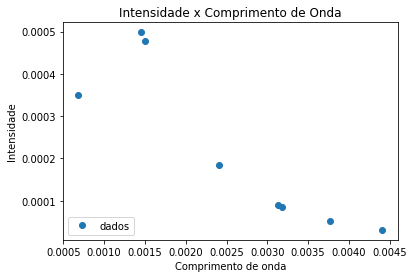

In [3]:
comprimento_onda = [ 0.00240909,0.00440909, 0.00145455, 0.0015, 0.00068182, 0.00318182, 0.00377273, 0.00313636 ]
intensidade = [ 1.84624538e-04, 3.09187920e-05, 4.98308988e-04, 4.78440909e-04, 3.50468717e-04, 8.58087852e-05, 5.10388936e-05, 8.95187626e-05 ]

plt.figure()
plt.plot(comprimento_onda,intensidade,'o', label='dados')
plt.title('Intensidade x Comprimento de Onda')
plt.xlabel('Comprimento de onda')
plt.ylabel('Intensidade')
plt.legend(loc=3)
plt.show()

O numero pontos é pouco para fazer uma integração numérica confíavel. Por isso interpole os dados usando Lagrange ou splines cúbicos, para 100 valores de  λ. Grafique a curva dos seus valores interpolados, junto com os dados acima

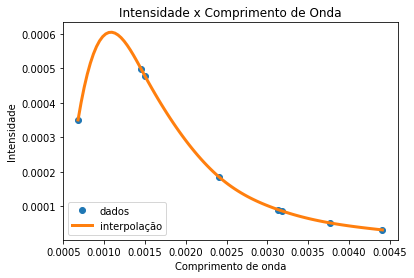

In [4]:
f3 = interp1d(comprimento_onda, intensidade, kind='cubic')

# vamos determinar valores de lambda no mesmo intervalo, porem em
# pontos intermediarios

limite_inferior = min(comprimento_onda)
limite_superior = max(comprimento_onda)
lambda_novo = np.linspace(limite_inferior, limite_superior, 100)
intensidade_nova = f3(lambda_novo)

plt.figure()
plt.plot(comprimento_onda,intensidade,'o', label='dados')
plt.plot(lambda_novo, intensidade_nova,label='interpolação',lw=3)

plt.title('Intensidade x Comprimento de Onda')
plt.xlabel('Comprimento de onda')
plt.ylabel('Intensidade')
plt.legend(loc=3)
plt.show()

# Q1 - b)

Utilizando o método de Simpson encontre a área embaixo da curva usando os valores interpolados. 

In [5]:
def simpson(a, b, N):
    '''Função que realiza a integração pelo método de Simpson.'''
    x = np.linspace(a,b,N)
    h = x[1]-x[0]
    integral = h/3*(f3(x[0]) + f3(x[-1]))
    fac = 4.
    for xi in x[1:-1]:
        integral += fac/3*h*f3(xi)
        fac = (2. if fac == 4. else 4.)
    return integral

In [6]:
# Integração utilizando Método de Simpson

N = 99
integral = simpson(limite_inferior, limite_superior, N)
print ('Integração pelo método de Simpson:', integral, 'com N =', N)

Integração pelo método de Simpson: 8.918990503430745e-07 com N = 99


A partir da equação acima encontre a temperatura,  T, correspondente a radiação cósmica de fundo

In [7]:
pi = math.pi
sigma = 5.670373e-8
temperatura = (pi*integral/sigma)**(1/4)
print ('Temperatura correspondente a radiação cósmica de fundo:', temperatura, 'K')
print('(calculada com valores interpolados)')

Temperatura correspondente a radiação cósmica de fundo: 2.651328172446325 K
(calculada com valores interpolados)


Comparação com a integral de apenas 8 pontos conhecidos:

In [8]:
x = comprimento_onda
y = intensidade
N = len(y)


def simpson(x, y):
    '''Função que realiza a integração pelo método de Simpson.'''
    h = x[1]-x[0]
    integral = h/3*(y[0] + y[-1])
    fac = 4.
    for yi in y[1:-1]:
        integral += fac/3*h*yi
        fac = (2. if fac == 4. else 4.)
    return integral

integral = simpson(x, y)
print ('Integração pelo método de Simpson:', integral, 'com número de pontos =', N)

Integração pelo método de Simpson: 2.9696336284000002e-06 com número de pontos = 8


In [9]:
pi = math.pi
sigma = 5.670373e-8
temperatura = (pi*integral/sigma)**(1/4)
print ('Temperatura correspondente a radiação cósmica de fundo:', temperatura, 'K')
print('(calculada com 8 valores conhecidos da tabela)')

Temperatura correspondente a radiação cósmica de fundo: 3.5814614372157836 K
(calculada com 8 valores conhecidos da tabela)


Discussão sobre os resultados:
O valor da temperatura de corpo negro mais preciso calculado atualmente para o universo é de $2,725$ K. Como podemos observar acima, a integração com 100 pontos foi consideravelmente mais precisa do que a integração para 8 pontos, tendo desviado cerca de 1% do valor real e assim confirmando o que foi enunciado na questão: a integração para poucos pontos não é confiável.

### 2. Expansão do universo
(Leitura de dados e ajuste de mínimos quadrados)

Em 1925 Edwin Hubble observou galaxias vizinhas à Via Láctea. Medindo o efeito Doppler da luz emitida ele 
encontrou que essas galaxias estão se afastando do sistema solar. Assim, ele foi o primeiro a provar que o universo se expande seguindo a relação

$$
v = H_0 D
$$

Onde $v$ é a velocidade radial à qual as galaxias se afastam, $D$ a distância à qual se localizam, e $H_0$ é a constante que determina a taxa à qual o universo se expande. 

(a, 30%) O arquivo `GalaxyData.txt`, contém medidas das velocidades radiais (de afastamento) e da distância de algumas galaxias. 

* Leia o arquivo e grafique $v$ como função de $D$. 

* Realize uma regressão de mínimos quadrados para determinar $H_0$. Que tão boa é sua correlação?

* O valor real de $H_0$ ainda não foi determinado de forma conclusiva, e de seu valor dependem os modelos
cosmológicos que explicam o universo. Será que o valor que obteve se encontra próximo das estimativas recentes?


# Q2

* Leia o arquivo e grafique $v$ como função de $D$.

In [10]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

In [11]:
data = pd.read_csv('GalaxyData.txt', comment='%', sep='\s+', header=None, \
               names=['Galaxy','Vr','D'])

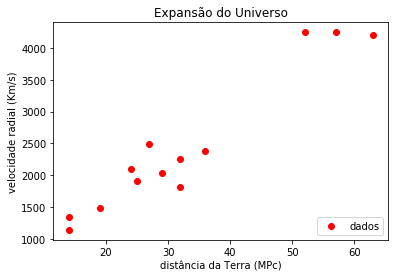

In [12]:
#Gráfico da velocidade em função da distância

dados1 = data.D.values.tolist()
dados2 = data.Vr.values.tolist()

plt.figure()
plt.scatter(dados1, dados2, c='r', label='dados')
plt.title('Expansão do Universo')
plt.xlabel('distância da Terra (MPc)')
plt.ylabel('velocidade radial (Km/s)')
plt.legend(loc=4)
plt.show()

* Realize uma regressão de mínimos quadrados para determinar $H_0$. Que tão boa é sua correlação?

In [13]:
#Algoritmo de Regressão linear

def sums(dados):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in dados:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]

def linear_lsf(dados,**args):
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    a0 = (Y*XX-X*XY)/(m*XX-X*X)
    a1 = (m*XY-X*Y)/(m*XX-X*X)    
    return a0,a1

def linear_f(x):
    a0,a1 = linear_lsf(dados)
    return a0+a1*x


def R2(dados):
    import math as mt
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

In [14]:
#Relacionando a equação de Edwin Hubble com a equação da reta (y = a1x + a0), 
#o valor de H_o corresponde ao valor de a1 e a0 deve ser aproximadamente zero. 
dados3 = zip(dados1, dados2)
dados = []
for i in dados3:
    dados.append(i)

a0, a1 = linear_lsf(dados)
r2  = R2(dados) # coeficiente de correlacao

print('a_0 = ', a0)
print('O valor de H_o = ', a1, 'km/s/Mpc')
print('Quão boa foi a linearização = ', r2, 'ou 96%')

a_0 =  241.20844806982907
O valor de H_o =  67.18228814880241 km/s/Mpc
Quão boa foi a linearização =  0.9613887096505842 ou 96%


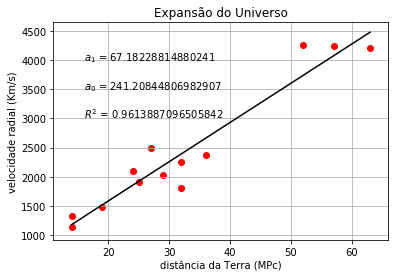

In [15]:
limite_inferior = min(dados1)
limite_superior = max(dados1)
x = np.linspace(limite_inferior, limite_superior, 100)
y = linear_f(x) # modelo lineal

# Graficamos o resultado
plt.text(16, 3000, r'$R^2$ = '+str(r2))
plt.text(16, 3500, r'$a_0$ = '+str(a0))
plt.text(16, 4000, r'$a_1$ = '+ str(a1))
plt.plot(x,y,'k')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.title('Expansão do Universo')
plt.xlabel('distância da Terra (MPc)')
plt.ylabel('velocidade radial (Km/s)')
plt.grid(True)

Como podemos observar o valor de a_0 se distanciou do esperado, porém vale ressaltar que utilizamos apenas 13 valores conhecidos, que em comparação com o número de galáxias que existem no universo, é um número desprezível. 

Por conta de todos esses dados do universo que não foram levados em consideração, justificasse o desvio no valor de a_0.

Ainda assim, o ajuste teve uma boa relação (96%).

* O valor real de $H_0$ ainda não foi determinado de forma conclusiva, e de seu valor dependem os modelos
cosmológicos que explicam o universo. Será que o valor que obteve se encontra próximo das estimativas recentes?

Resposta: O valor mais atual da constante de Hubble é H0 = $71$ km/s/Mpc.
O valor calculado acima é de $67,18$ km/s/Mpc, que se aproxima satisfatóriamente do valor.
Levando-se em consideração a escassez de dados para análise, foi uma boa aproximação.